# **Forecasting Used Car Prices Using Regression**

This project aims to develop a regression model that accurately predicts the prices of used cars based on key features, enabling buyers and sellers to make informed decisions and optimize value in the pre-owned car market.

**1.Importing Libraries, Reading and Understanding the data**

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/datasets/train-data.csv')

In [4]:
#Understand the data
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
#Checking for shape of the data
df.shape

(6019, 14)

**2.Data Cleaning**

In [6]:
#changing column 'Name' to 'Brand' to list only the brand name
df['Brand']=df['Name'].apply(lambda x:x.split()[0])

In [7]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


In [8]:
#checking for missing values
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Brand                   0
dtype: int64

In [9]:
#dropping unwanted columns
df.drop(['Unnamed: 0','New_Price','Name'],axis=1,inplace=True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti


In [10]:
df.isna().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

**3.Exploratory Data Analysis(EDA)**

Count Plot

<Axes: xlabel='Fuel_Type', ylabel='count'>

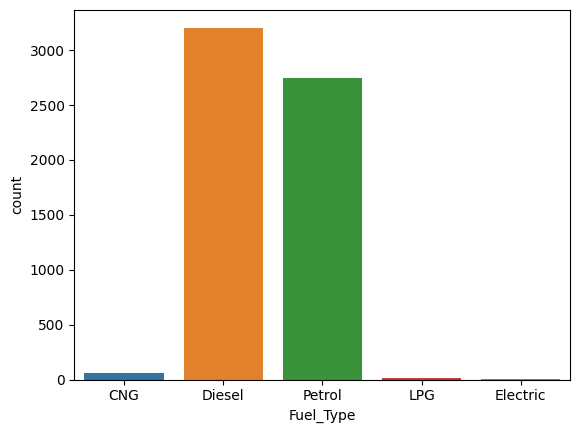

In [11]:
sns.countplot(data = df, x = df['Fuel_Type'])

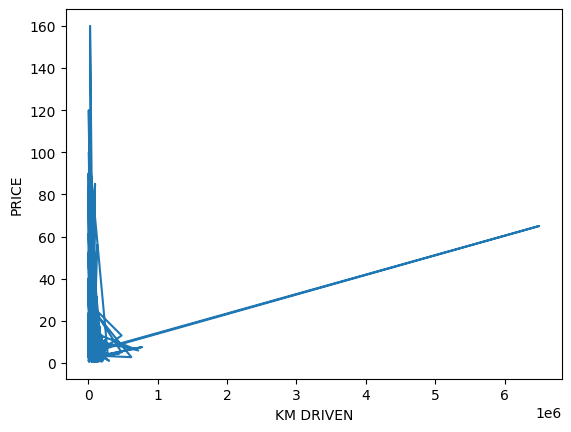

In [12]:
#plot against km driven and prices of the car
plt.plot(df['Kilometers_Driven'],df['Price'])
plt.xlabel('KM DRIVEN')
plt.ylabel('PRICE')
plt.show()

Heat Map

<Axes: >

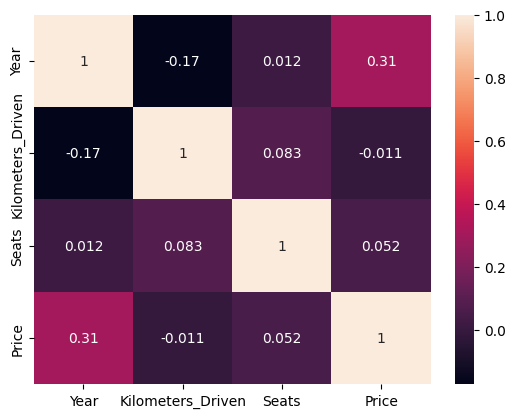

In [13]:
sns.heatmap(df.corr(),annot=True)

**4.Data Preprocessing**

In [14]:
#checking for datatype
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand                 object
dtype: object

In [15]:
#converting categorical(non-numeric) data into numerical labels
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])
df['Owner_Type']=le.fit_transform(df['Owner_Type'])
df['Brand']=le.fit_transform(df['Brand'])

In [16]:
df.dtypes

Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand                  int64
dtype: object

In [17]:
#changing the columns containing string values
df['Mileage']=df['Mileage'].str.replace('km/kg',"")
df['Mileage']=df['Mileage'].str.replace('kmpl',"")
df['Engine']=df['Engine'].str.replace('CC',"")
df['Power']=df['Power'].str.replace('null',"0")
df['Power']=df['Power'].str.replace('bhp',"")


In [18]:
#changing datatype to float
df['Mileage']=df['Mileage'].astype(float)
df['Engine']=df['Engine'].astype(float)
df['Power']=df['Power'].astype(float)

In [19]:
#again checking if all datatypes are converted
df.dtypes

Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                  int64
dtype: object

In [20]:
#filling missing values using mean and mode
df['Power']=df['Power'].fillna(df['Power'].mean())
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])
df['Seats']=df['Seats'].fillna(df['Seats'].mode()[0])
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [21]:
#splitting X values
X=df.drop(['Price'],axis=1)
X

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,18
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,10
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,9
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,18
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6014,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,18
6015,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,10
6016,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,17
6017,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,18


In [22]:
#splitting for y values
y=df['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

**5.Feature Selection**

In [23]:
df.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
Location,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018773,-0.079206,-0.063908,-0.037607,-0.116620,0.026295
Year,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.321534,-0.046288,0.070520,0.015204,0.305327,0.018578
Kilometers_Driven,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.065253,0.090476,0.024197,0.082782,-0.011493,0.028232
Fuel_Type,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.152125,-0.403143,-0.262923,-0.299306,-0.305207,-0.068246
Transmission,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.333096,-0.498935,-0.632029,0.074838,-0.586025,0.168697
Owner_Type,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.154188,0.046247,0.005638,0.002219,-0.094559,-0.027582
Mileage,0.018773,0.321534,-0.065253,-0.152125,0.333096,-0.154188,1.000000,-0.581302,-0.444878,-0.299631,-0.306588,-0.013374
Engine,-0.079206,-0.046288,0.090476,-0.403143,-0.498935,0.046247,-0.581302,1.000000,0.839684,0.393849,0.657196,0.009390
Power,-0.063908,0.070520,0.024197,-0.262923,-0.632029,0.005638,-0.444878,0.839684,1.000000,0.109025,0.757711,-0.177018
Seats,-0.037607,0.015204,0.082782,-0.299306,0.074838,0.002219,-0.299631,0.393849,0.109025,1.000000,0.052811,0.189674


In [24]:
X.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'],
      dtype='object')

In [25]:
#removing columns 'Kilometers_Driven' and 'Owner_Type' as it have less correlation.
X=df[['Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Brand','Location','Seats']]

In [26]:
X.head(3)

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Brand,Location,Seats
0,2010,0,1,26.60,998.0,58.16,18,9,5.0
1,2015,1,1,19.67,1582.0,126.20,10,10,5.0
2,2011,4,1,18.20,1199.0,88.70,9,2,5.0


In [27]:
#scaling the X values
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.02713851, -1.57030559,  0.63252909, ...,  0.33132605,
         1.14365818, -0.34329324],
       [ 0.50216112, -0.90577143,  0.63252909, ..., -0.66226004,
         1.48198899, -0.34329324],
       [-0.72127858,  1.08783104,  0.63252909, ..., -0.7864583 ,
        -1.22465746, -0.34329324],
       ...,
       [-0.41541866, -0.90577143,  0.63252909, ...,  0.20712779,
         0.12866576,  3.37750269],
       [-0.10955873,  1.08783104,  0.63252909, ...,  0.33132605,
         0.80532737, -0.34329324],
       [-0.72127858, -0.90577143,  0.63252909, ..., -1.4074496 ,
        -0.20966505, -0.34329324]])

In [28]:
#train-test splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4213, 9), (1806, 9), (4213,), (1806,))

**6.Model Building and Evaluation**

In [30]:
#converting x values into polynomials
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly1=poly.fit_transform(X_train)


In [31]:
x_poly2=poly.transform(X_test)

Multiple Linear Regression with Polynomial Features

In [32]:
mlr=LinearRegression()
mlr.fit(x_poly1,y_train)
y_pred=mlr.predict(x_poly2)
y_pred

array([ 0.40673828,  2.58896637, 20.34881592, ...,  5.72541428,
       22.49697495, -6.09660721])

In [33]:
#model evaluation
print('r2_score:',r2_score(y_test,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))

r2_score: 0.8469077375695623
mean_absolute_error: 2.390649997292959
mean_squared_error: 19.16099989288426


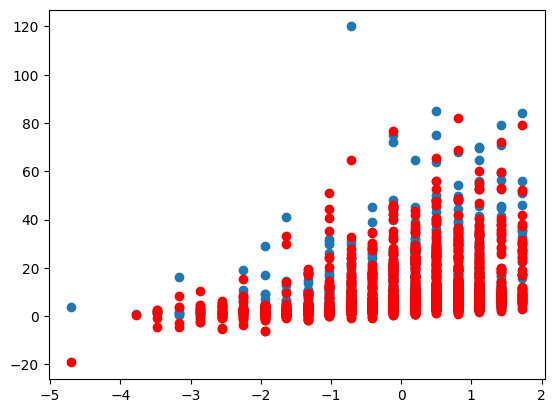

In [34]:
#plot against one of the input features and y-actual & y-predicted
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],y_pred,color='r')
plt.show()

KNeighbors Regressor

In [35]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn


array([ 2.898,  4.398, 23.458, ...,  6.11 , 11.782,  3.478])

In [36]:
print('r2_score:',r2_score(y_test,y_pred_knn))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_knn))

r2_score: 0.8453931712669912
mean_absolute_error: 1.9688150609080843
mean_squared_error: 19.35056273754153


Support Vector Regressor

In [37]:
sv=SVR(kernel='poly')
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([ 1.18120285,  4.59993346, 20.01713473, ...,  5.49096166,
       16.68383896,  5.19237715])

In [38]:
print('r2_score:',r2_score(y_test,y_pred_sv))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_sv))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_sv))

r2_score: 0.8278124545907601
mean_absolute_error: 2.3598762007157164
mean_squared_error: 21.550962058853774


RandomForest Regressor

In [39]:
rf = RandomForestRegressor(n_estimators=155, random_state=17, max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [40]:
print('r2_score:',r2_score(y_test,y_pred_rf))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_rf))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_rf))

r2_score: 0.8960973293123077
mean_absolute_error: 1.51285740870906
mean_squared_error: 13.004439481857421


**7.Hyper Parameter Tuning**

Applying GridSearchCV to explore different combinations of hyperparameter values (e.g., n_neighbors, weights, etc.), evaluating performance with cross-validation.
Select the best hyperparameters based on the search results, which optimize the KNeighborsRegressor's performance

In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [42]:
knn1=KNeighborsRegressor()
params = {'n_neighbors': [3, 5, 7, 9],                  # Try different values for 'n_neighbors'
              'weights': ['uniform', 'distance'],           # Try different weight options
              'p': [1, 2],                                  # Try different distance metrics (1 for Manhattan distance, 2 for Euclidean distance)
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [43]:
clf=GridSearchCV(knn1,params,cv=5,scoring='r2')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [44]:
clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [45]:
knn=KNeighborsRegressor(algorithm='auto',p=1,n_neighbors=3, weights='uniform')
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([ 2.86333333,  3.06666667, 19.83333333, ...,  5.41666667,
       12.75      ,  2.13333333])

In [46]:
print('r2_score:',r2_score(y_test,y_pred_knn))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_knn))

r2_score: 0.8565208739770542
mean_absolute_error: 1.8295884090070136
mean_squared_error: 17.957821477790084


After applying hyperparameter tuning, the accuracy of the KNeighborsRegressor model only showed a slight improvement, indicating that the default hyperparameters were already reasonably well-suited for the dataset, leaving limited room for further enhancement through tuning.

**8.Prediction on new data**

Use the trained and tuned model to make predictions on new, unseen data.

In [47]:
#predicting new data
new_pred=rf.predict(sc.transform([[2010,0,1,26.60,998.0,58.16,18,9,5.0]]))
print('predicted price of the car with given details(in lakh): ',new_pred)

predicted price of the car with given details(in lakh):  [2.02133333]


In conclusion, the RandomForest Regressor achieved a promising R2 score of 0.8960, which is the highest of the used regressors demonstrating its effectiveness in predicting used car prices based on the selected features.